
TP2 - CLASE 3

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.


Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

Usando el método descripto en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain" comparar el resultado de un filtrado por convolución con el filtrado espectral.

Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper "Analysis of focus measure operators in shape-from-focus"

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_gauss_filter(h, w, k_size, sigma):
    """
    Crea un filtro gaussiano en el dominio espacial y su transformada de Fourier.
    
    Args:
        h (int): Altura de la imagen.
        w (int): Ancho de la imagen.
        k_size (int): Tamaño del kernel.
        sigma (float): Desviación estándar de la gaussiana.
        
    Returns:
        tuple: (filtro_gaussiano, filtro_gaussiano_fourier)
    """
    
def create_gauss_filter(h, w, k_size, sigma):
    # Crear el kernel gaussiano en el dominio espacial
    x = np.linspace(-k_size // 2, k_size // 2, k_size)
    y = np.linspace(-k_size // 2, k_size // 2, k_size)
    x, y = np.meshgrid(x, y)
    gauss_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)
    
    # Pad kernel to the size of the image
    padded_gauss_kernel = np.zeros((h, w))
    pad_x = (h - k_size) // 2
    pad_y = (w - k_size) // 2
    padded_gauss_kernel[pad_x:pad_x+k_size, pad_y:pad_y+k_size] = gauss_kernel
    
    # Calcular la transformada de Fourier del kernel gaussiano
    gauss_kernel_fourier = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(padded_gauss_kernel)))
    
    return padded_gauss_kernel, gauss_kernel_fourier



In [3]:
#funciones auxiliares

def apply_filter(image, gauss_kernel, gauss_kernel_fourier):
    # Aplicar el filtro gaussiano en el dominio espacial
    filtered_image_spatial = cv2.filter2D(image, -1, gauss_kernel)
    
    # Aplicar el filtro gaussiano en el dominio espectral
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    filtered_image_fft = image_fft * gauss_kernel_fourier
    filtered_image_spectral = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_image_fft)))
    
    return filtered_image_spatial, filtered_image_spectral


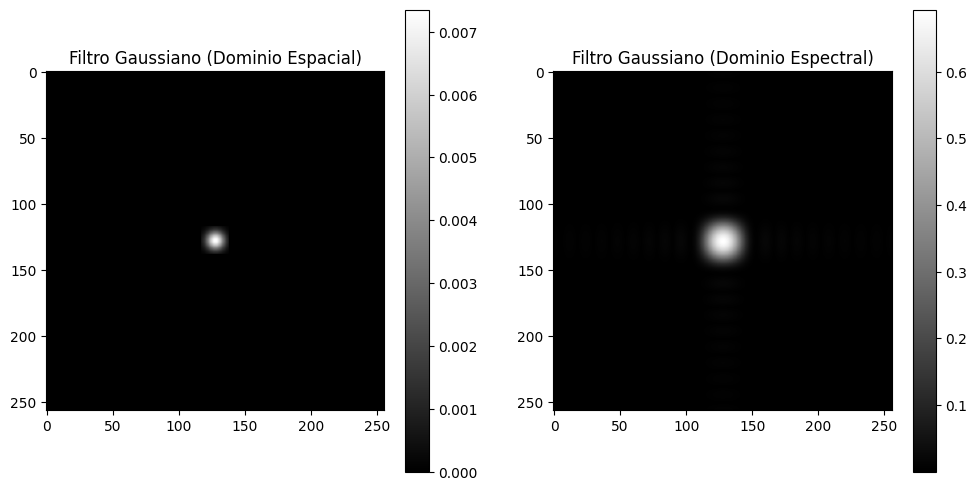

In [6]:
def plot_filters(gauss_kernel, gauss_kernel_fourier):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Filtro Gaussiano (Dominio Espacial)')
    plt.imshow(gauss_kernel, cmap='gray')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.title('Filtro Gaussiano (Dominio Espectral)')
    plt.imshow(np.log(np.abs(gauss_kernel_fourier) + 1), cmap='gray')
    plt.colorbar()

    plt.show()

h, w = 256, 256  # Tamaño de la imagen
k_size = 21      # Tamaño del kernel
sigma = 5        # Desviación estándar

gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)
plot_filters(gauss_kernel, gauss_kernel_fourier)


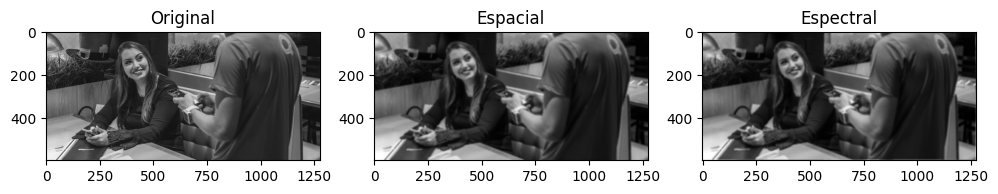

In [8]:
# Leer la imagen en escala de grises
image = cv2.imread('./Material_TPs/img_tp2.png', cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Parámetros del filtro gaussiano
k_size = 15  # Tamaño del kernel gaussiano
sigma = 3    # Desviación estándar del kernel gaussiano

# Crear el filtro gaussiano
gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Aplicar el filtro
filtered_image_spatial, filtered_image_spectral = apply_filter(image, gauss_kernel, gauss_kernel_fourier)

# Visualizar las imágenes resultantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Espacial')
plt.imshow(filtered_image_spatial, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Espectral')
plt.imshow(filtered_image_spectral, cmap='gray')

plt.show()


Métrica de nitidez del paper "Image Sharpness Measure for Blurred Images in Frequency Domain"

El paper propone una métrica basada en la energía de alta frecuencia en la imagen. Una manera común de hacerlo es utilizando la suma de los valores absolutos del espectro de Fourier.

In [9]:

def calculate_image_quality(image_path):
    # Paso 1: Cargar la imagen y convertirla a escala de grises
    I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    M, N = I.shape
    
    # Paso 2: Calcular la Transformada de Fourier de la imagen
    F = np.fft.fft2(I)
    
    # Paso 3: Desplazar el origen de F al centro
    Fc = np.fft.fftshift(F)
    
    # Paso 4: Calcular el valor absoluto de la transformada centrada
    AF = np.abs(Fc)
    
    # Paso 5: Encontrar el valor máximo del componente de frecuencia
    M_max = np.max(AF)
    
    # Paso 6: Calcular el umbral
    thres = M_max / 1000
    
    # Paso 7: Contar el número total de píxeles en F cuyo valor de píxel > thres
    TH = np.sum(AF > thres)
    
    # Paso 8: Calcular la medida de calidad de la imagen (FM)
    FM = TH / (M * N)
    
    return FM


In [11]:
# Ruta a la imagen
image_path = './Material_TPs/img_tp2.png'

# Calcular y mostrar la medida de calidad de la imagen
FM = calculate_image_quality(image_path)
print(f'Medida de Calidad de la Imagen (FM): {FM}')


Medida de Calidad de la Imagen (FM): 0.014063098869596719


Otra Opcion de la misma implementación:

In [12]:
def sharpness_frequency_domain(image_path):

    # Verificar si el argumento es una ruta de archivo (cadena) o una imagen (numpy.ndarray)
    if isinstance(image, str):
        I = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        if I is None:
            raise ValueError(f"No se pudo cargar la imagen en la ruta especificada: {image}")
    else:
        I = image
    
    # Verificar que la imagen se haya cargado correctamente
    if I is None:
        raise ValueError("La imagen no es válida")
    
    M, N = I.shape
    
    # Calcular la transformada de Fourier de la imagen
    image_fft = np.fft.fft2(I)
    image_fft_shift = np.fft.fftshift(image_fft)
    
    M_max = np.max(image_fft_shift)
    thres = M_max / 1000
    
    # Calcular la magnitud del espectro de Fourier
    magnitude_spectrum = np.abs(image_fft_shift)
    
    # La métrica es la suma de los valores de alta frecuencia normalizados
    TH = np.sum(magnitude_spectrum > thres)
    FM = TH / (M * N)

    return FM


In [13]:

# Ruta a la imagen
image_path = 'C:\\Users\\leand\\Downloads\\news-img.png'

# Calcular y mostrar la medida de calidad de la imagen
FM = sharpness_frequency_domain(image_path)
print(f'Medida de Calidad de la Imagen (FM): {FM}')


Medida de Calidad de la Imagen (FM): 0.014063098869596719


Implementar una métrica de nitidez del paper "Analysis of focus measure operators in shape-from-focus"

Una métrica comúnmente utilizada en este contexto es la varianza del Laplaciano.

In [14]:
def variance_of_laplacian(image_path):
    # Verificar si el argumento es una ruta de archivo (cadena) o una imagen (numpy.ndarray)
    if isinstance(image, str):
        I = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        if I is None:
            raise ValueError(f"No se pudo cargar la imagen en la ruta especificada: {image}")
    else:
        I = image
    
    # Calcular el Laplaciano de la imagen
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Calcular la media del Laplaciano
    mean_laplacian = np.mean(laplacian)

    # Calcular la varianza del Laplaciano utilizando la media calculada
    variance_laplacian = np.mean((laplacian - mean_laplacian) ** 2)

    return variance_laplacian


In [15]:
# Ruta a la imagen
image_path = 'C:\\Users\\leand\\Downloads\\news-img.png'

# Calcular y mostrar la varianza del Laplaciano de la imagen
try:
    laplacian_variance = variance_of_laplacian(image_path)
    print(f'Varianza del Laplaciano de la Imagen: {laplacian_variance}')
except ValueError as e:
    print(e)


Varianza del Laplaciano de la Imagen: 552.7641224728018


Métrica de nitidez en el dominio espacial: 0.014063098869596719
Métrica de nitidez en el dominio espectral: 0.014063098869596719
Varianza del Laplaciano en el dominio espacial: 552.7641224728018
Varianza del Laplaciano en el dominio espectral: 552.7641224728018


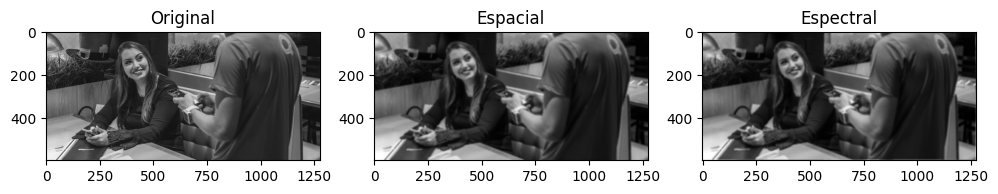

In [16]:

image = cv2.imread('./Material_TPs/img_tp2.png', cv2.IMREAD_GRAYSCALE)
h, w = image.shape
k_size = 15
sigma = 3

gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)
filtered_image_spatial, filtered_image_spectral = apply_filter(image, gauss_kernel, gauss_kernel_fourier)

sharpness_spatial = sharpness_frequency_domain(filtered_image_spatial)
sharpness_spectral = sharpness_frequency_domain(filtered_image_spectral)
laplacian_spatial = variance_of_laplacian(filtered_image_spatial)
laplacian_spectral = variance_of_laplacian(filtered_image_spectral)

print("Métrica de nitidez en el dominio espacial:", sharpness_spatial)
print("Métrica de nitidez en el dominio espectral:", sharpness_spectral)
print("Varianza del Laplaciano en el dominio espacial:", laplacian_spatial)
print("Varianza del Laplaciano en el dominio espectral:", laplacian_spectral)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Espacial')
plt.imshow(filtered_image_spatial, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Espectral')
plt.imshow(filtered_image_spectral, cmap='gray')

plt.show()

Podemos ver que en ambos casos las métricas son las mismas tanto para el dominio espacial como el dominio espectral por lo que podemos concluir que se podrían trabajar indistintamente en cualquiera de los dos dominios, teniendo como ventaja la optimización que brinda trabajar en el dominio espectral con las imagenes procesadas y las transformaciones de fourier ya realizadas.